# Part I - (San Francisco FordGo Bikeshare Analysis)
## by (Victoria Dominion Robert)

## Introduction
> Bike sharing is a form of transportation that is easy to use, enjoyable and convenient. it involves a number of bikes parked at different locations where people can rent a bike by unlocking it with an app and returning after use to any bike station around the city. Unlocked bikes can be returned to any other station in the system, even if they were originally rented from a different station. People use bike sharing for many different reasons, such as commuting to work or school, running errands, and getting to and from appointments. There are about 183,412 records and 16 features in the bike share 2019 records dataset used for this project.


## Preliminary Wrangling


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
#Loading in the fordgobike share dataset into a pandas dataframe named bikeshare
df = pd.read_csv('201902-fordgobike-tripdata.csv')
#printing just the first five columns of the dataset
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
#printing the shape and content of the dataset to have an overview of the dataset
print(df.shape)
print(df.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [9]:
# using the .info() function to have indepth knowledge about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [10]:
#using the .isnull() function to check for columns that have null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [12]:
#using the .duplicated() function to check for duplicated values
df.duplicated().sum()

0

In [13]:
#using .describe function to know the statistics of the dataset
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [14]:
#checking the unique values of the member_gender column
df.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [16]:
#checking the unique values of the type of users in the dataset
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [17]:
df.member_birth_year.unique()

array([ 1984.,    nan,  1972.,  1989.,  1974.,  1959.,  1983.,  1988.,
        1992.,  1996.,  1993.,  1990.,  1981.,  1975.,  1978.,  1991.,
        1997.,  1986.,  2000.,  1982.,  1995.,  1980.,  1973.,  1985.,
        1971.,  1979.,  1967.,  1998.,  1994.,  1977.,  1999.,  1987.,
        1969.,  1963.,  1976.,  1964.,  1965.,  1961.,  1968.,  1966.,
        1962.,  1954.,  1958.,  1960.,  1970.,  1956.,  1957.,  1945.,
        1900.,  1952.,  1948.,  1951.,  1941.,  1950.,  1949.,  1953.,
        1955.,  1946.,  1947.,  1931.,  1943.,  1942.,  1920.,  1933.,
        2001.,  1878.,  1901.,  1944.,  1928.,  1934.,  1939.,  1930.,
        1902.,  1910.,  1938.,  1927.])

### What is the structure of your dataset?

> The dataset consists of 183412 rows and 16 columns

### What is/are the main feature(s) of interest in your dataset?

> The main features of my interest are;
1) user_type
2) gender
3) duration
4) member age

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start_station_name, bike_id, end_station_name, usertype, start_time, end_time, member_birth_year, member_gender, duration, start_station_latitude, start_station_longitude, end_station_latitude and end_station_longitude.

## Observation
1. some columns have wrong datatype eg start_time and end_time, member_gender, user_type and bike_share_for_all_trip. 
2. some columns contains NaN values.

Before I proceed to the exploration phase, the dataset must be cleaned. I will first have a copy of the dataset before cleaning so I can get to come back to the original dataset if any issue should arise.


In [19]:
df = df.copy()

## Data Cleaning or Preparation Phase

In [20]:
#1. The date column datatype should be changed to datetime datatype
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])


In [21]:
#2. The date column should be splitted into hour, day, month and year.
df['start_month_name']=df['start_time'].dt.strftime('%B')
df['start_month']=df['start_time'].dt.month.astype(int)
df['start_week']=df['start_time'].dt.strftime('%a')
df['start_day']=df['start_time'].dt.day.astype(int)
df['start_hour']=df['start_time'].dt.hour


In [22]:
#clean_bikeshare.replace([0,1,2,3,4,5,6],["Mon","Tue","Wed","Thu","Fri","Sat","Sun"],inplace=True)
#3. The member_gender, user_type and the bike_share_for_all_trip datatype should be change to a categorical datatype
for col in ['member_gender', 'user_type', 'bike_share_for_all_trip']:
    df[col] = df[col].astype('category')


In [23]:
#4. The bike_id,start_station_id and the end_station_id should be changed to an object datatype.
for col in ['bike_id', 'start_station_id', 'end_station_id']:
    df[col] = df[col].astype('object')


In [24]:
#5. Calculate the members age by their birth_year information provided.
df['Age'] = 2019 - df['member_birth_year']


In [25]:
# printing to check the changes implemented
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 22 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null object
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null category
start_month_name           183412 non-null object
start_month  

## Univariate Exploration

## Question 1: 
What gender uses the bikeshare service more?

In [26]:
#storing the days of the week in 'day_order'
day_order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [27]:
#A user-defined function to plot countplot
def countplot (df, column, order=None, color=None):
    plt.figure(figsize=[10,6])
    sb.countplot(data = df, x=column, color = color, order=order);
    plt.title(f'''Distribution of {column}'''.title(), fontsize=14, weight ='bold')
    plt.xlabel(column.title(),fontsize=10, weight='bold')
    plt.ylabel('Frequency'.title(),fontsize=10,weight='bold')


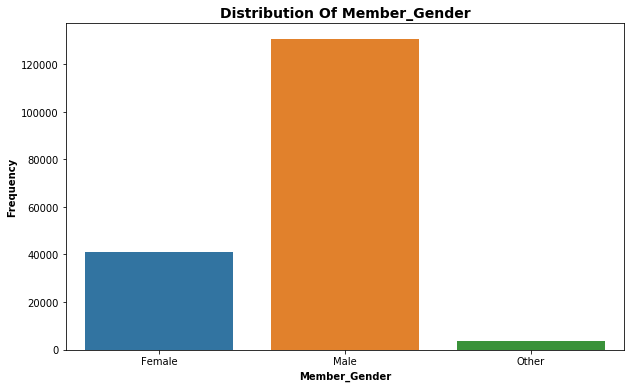

In [28]:
#3. calling plot function for gender distribution
countplot(df,'member_gender')

## Observation:
The male gender tends to use the bikeshare service more than the female gender.


## Question 2:
What are the ages of the members that use the FordGo Bikeshare services more?

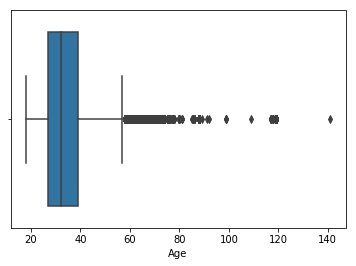

In [29]:
#1. The age of the members
sb.boxplot(data=df, x='Age')

## Observation: 
The ages of the members are below 60. For a clearer view, I'd remove the members with ages greater than 60.

In [30]:
#2. remove members ages > 60
df = df.query('Age < 60')
print(df.Age.unique())

[ 35.  47.  30.  45.  36.  31.  27.  23.  26.  29.  38.  44.  41.  28.  22.
  33.  19.  37.  24.  39.  46.  34.  48.  40.  52.  21.  25.  42.  20.  32.
  50.  56.  43.  55.  54.  58.  51.  53.  57.  59.  49.  18.]


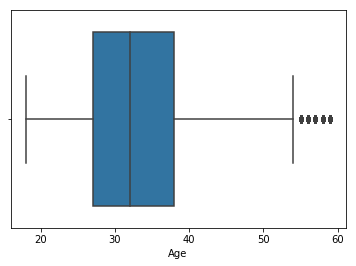

In [32]:
#3. re-plotting the members age boxplot
sb.boxplot(data=df, x='Age')

## Question 3: 
What hours of the day have the highest number of trips?

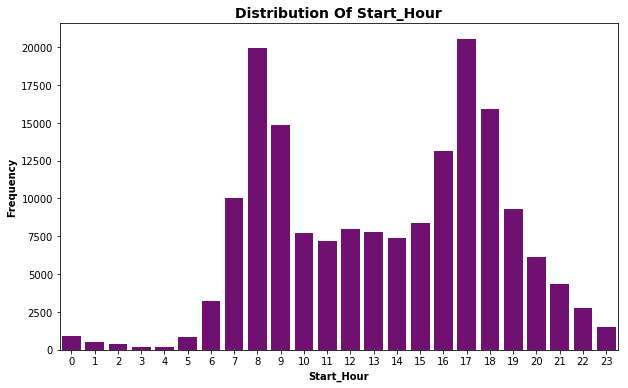

In [37]:
#4. calling plot function for distribution of trips per start_hour
countplot(df,'start_hour', color='purple')

## Observation: 
In the distribution of start hour chart above, it is observed that the highest trips happens to be around 8 am in the morning and 5pm (17) in the evening. This observation is very realistic, since people go to work early in the morning at about 8am and returns around 5pm in the evening. I also observed that 3am in the morning has the lowest trip to occur probably because people are sleeping at that time.


## Question 4: 
What days of the week have the highest number of trips?

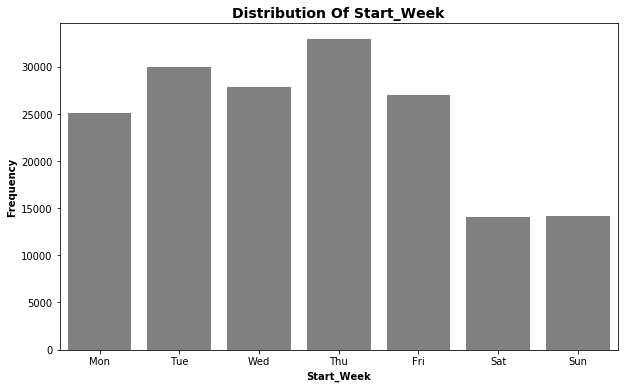

In [36]:
#5. calling plot function for the distribution of trips per week day
countplot(df,'start_week', color = 'grey', order=day_order)

## Observation: 
From the graph above, it is seen that Thursday has the highest number of trips, followed by Tuesday, then wednesday. While saturday and sunday seem to have expected reduction on trips, since most people will likely be at home for weekends.


## Question 5: 
Which type of users use the bikeshare service more?

Subscriber    154618
Customer       16375
Name: user_type, dtype: int64


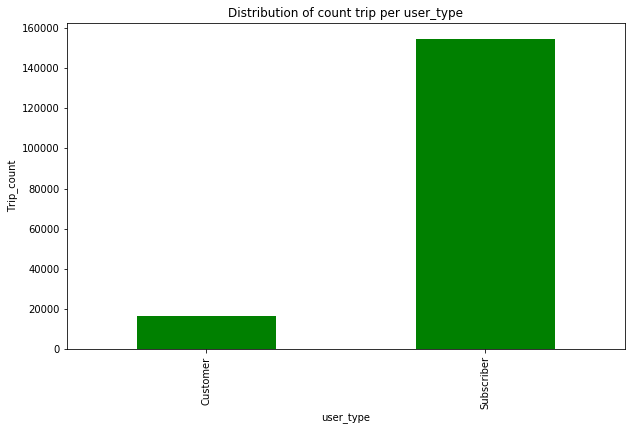

In [38]:
#6. Distribution of count trip per user_type
plt.figure(figsize = [10, 6])
print(df['user_type'].value_counts())
ax = df['user_type'].value_counts().sort_index()\
.plot(kind = 'bar',color ='green',\
      title = "Distribution of count trip per user_type")
ax.set_xlabel("user_type")
ax.set_ylabel("Trip_count")
plt.show()

## Observation:
From the chart above, it can be seen that subscriber users are more than the customers. I will advice that the fordgobike share business owners should channel more of their marketing and advertisement to the subscribers.


## Question 6: 
What is the longest duration of a bike ride?


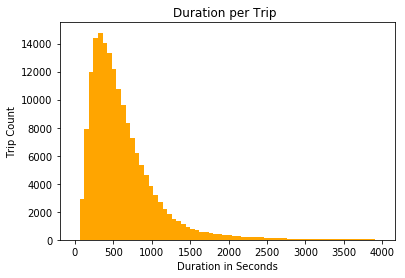

In [39]:
#7. Duration per trip
binz = np.arange(0, 4000, 60)

plt.hist(data = df, x = 'duration_sec', bins = binz , color= "orange")
plt.title("Duration per Trip ")
plt.xlabel('Duration in Seconds')
plt.ylabel('Trip Count');

## Observation: 
1. The longest trip happens in about 500 seconds, which when converted is 8 minutes.
2. There were lesser trips when the duration is high, for example, when the duration is about 3500 secs which is about 58 minutes or let's say an hour.
3. it is safe to conclude that maybe people don't travel on a bike to a very far distance.

## Question 7: 
Which bike stations does users usually start their trips from and end their trips on?


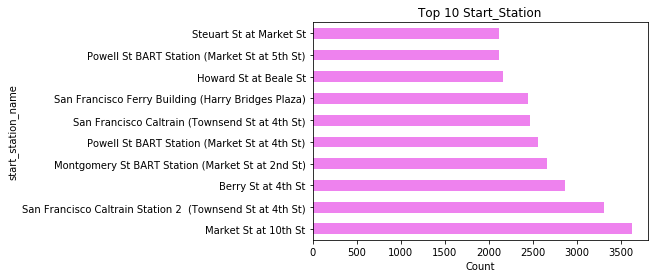

In [41]:
#8.Top ten start_station_name
ax = df['start_station_name'].value_counts()\
.head(10)\
.plot(kind = 'barh', title = 'Top 10 Start_Station', color = 'violet')
ax.set_xlabel('Count')
ax.set_ylabel('start_station_name')
plt.show()

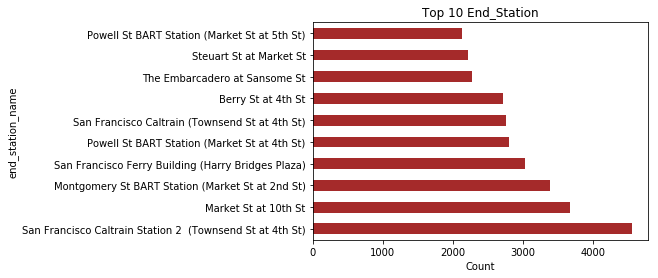

In [43]:
#9.Top ten end_station_name
ax = df['end_station_name'].value_counts()\
.head(10)\
.plot(kind = 'barh', title = 'Top 10 End_Station', color = 'brown')
ax.set_xlabel('Count')
ax.set_ylabel('end_station_name')
plt.show()

## Observation:
From the two charts above, it is seen that: 
1. there are similaries betweeen the 'San Francisco Caltrain Station 2' and 'Market St at 10th St' start_station and end_station. 
2. a greater number of trips start and end in these two stations.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Yes, for the Age, there were unusual points, so I had to do a transformation, because I noticed that the member age was less than 60, so i just used ages less than 60 so that the distributions can be clearer

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, I did. The datatype for start_time column was changed. I had to split the data into the hour, weekday and month, so I could have a better insight.

## Bivariate Exploration

## Question 8: 
Which gender go on longer trips?

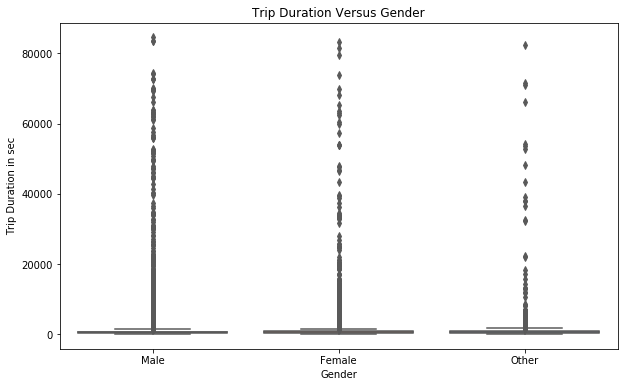

In [44]:
# 10. Trip Duration Versus Gender
plt.figure(figsize = [10, 6])
sb.boxplot(x='member_gender', y='duration_sec', data = df, 
           order=['Male', 'Female', 'Other'],palette ='Set2')
plt.title('Trip Duration Versus Gender')
plt.xlabel('Gender')

plt.ylabel('Trip Duration in sec')
plt.show()

## Observation: 
The male gender covers more duration than the female gender and other gender types.

## Question 9: 
Which type of users go on longer trips?

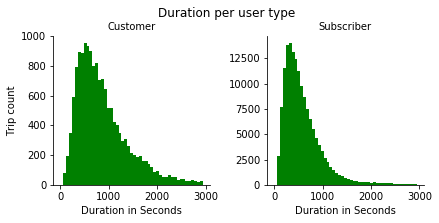

In [46]:
# 11.Duration per user_type
duration_user = sb.FacetGrid(df, col="user_type", margin_titles=True,sharey = False)
binz = np.arange(0, 3000,60)
duration_user.map(plt.hist, "duration_sec",color="green", bins=binz)
duration_user.set_axis_labels("Duration in Seconds", "Trip count")
duration_user.set_titles(col_template = '{col_name}')
duration_user.fig.suptitle('Duration per user type', y=1.02);

## Observation: 
This charts shows that the customers have longer trip durations compared to the subscribers


## Question 10: 
Which age of the users go on longer trips?

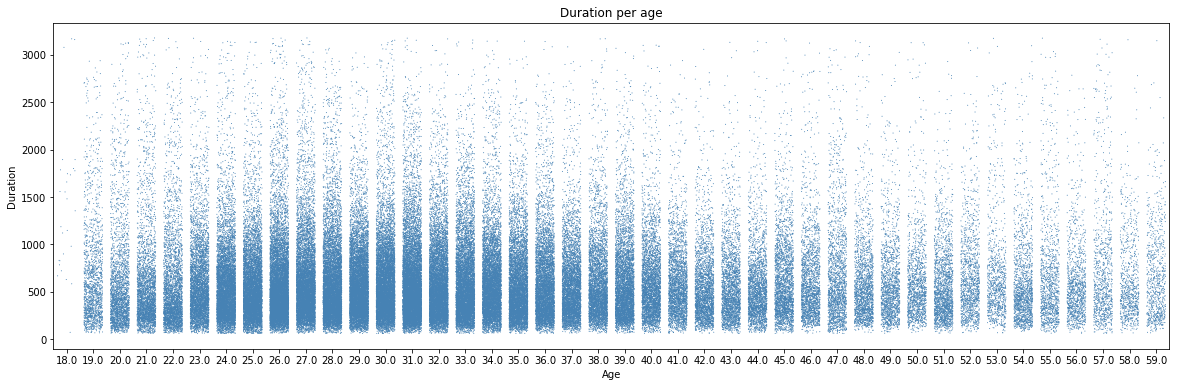

In [47]:
# 12.Duration per Age
plt.figure(figsize=(20,6))
sb.stripplot(data=df.query('duration_sec<duration_sec.quantile(0.99)'), 
             x='Age', y='duration_sec', size=1,jitter=0.35, color='steelblue')
plt.title('Duration per age')
plt.xlabel('Age')
plt.ylabel('Duration');

## Observation:
At around age 20 to 40, the trip duration is higher than older ages.

## Question 11: 
What is the distribution of age across the gender?

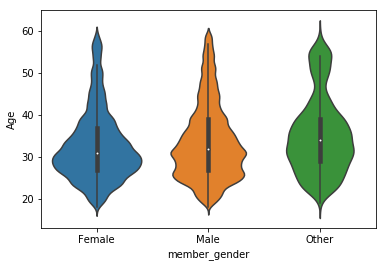

In [48]:
#13.Ages versus Gender
import seaborn as sns
#plt.style.use('ggplot')
#pd.set_option('max_columns',200)
sns.violinplot(x ='member_gender', 
                y = 'Age',
               data = df)
plt.show()

## Observation: 
From the plot above:
1. the ages of female users are about 20 to 50 years and males are about 20 to 60 years old. 
2. a greater number of females are within the ages of 25 and 35 while a greater number of males are within the ages of 25 and 40.

## Question 12: 
Which age group and user type have the highest trip count?

In [49]:
# Here, I grouped the members age.
df['age_group'] = df['Age'].apply(lambda x: 'Teenager' if 12<x<=19
                                                  else 'Young Adult' if 19<x<=30
                                                  else 'Adult' if 30<x<=49
                                                  else 'Senior' if 49<x
                                                           else x)

In [50]:
df.age_group.value_counts()

Adult          84522
Young Adult    72643
Senior         12116
Teenager        1712
Name: age_group, dtype: int64

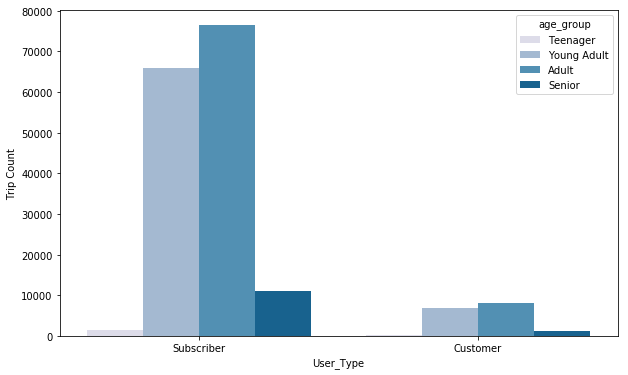

In [51]:
#14. Trip Count for each age group with their user type
plt.figure(figsize = [10, 6])
age_order=['Teenager','Young Adult', 'Adult', 'Senior']
age_chart = sb.countplot(data=df, x="user_type", hue="age_group", hue_order=age_order, palette='PuBu', 
                          order=df.user_type.value_counts().index)
age_chart.set_xlabel('User_Type')
age_chart.set_ylabel('Trip Count');

## Observation: 
The adult subscribers have the highest trip count while the teenagers have the lowest trip count.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The male gender covers more duration than the female gender.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Customers goes on a longer duration of trips than the subscribers. Also, the subscribers has the highest count of trips than the customers

## Multivariate Exploration


## Question 13: 
What gender has longer trip durations on weekdays

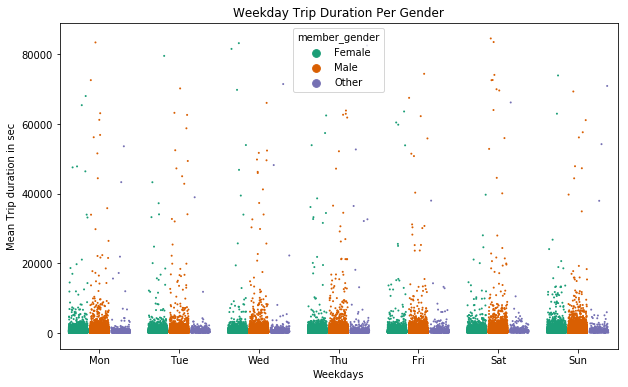

In [52]:
#14. Weekday trip duration per gender
plt.figure(figsize=[10, 6])
sb.stripplot(data = df, x = 'start_week', y = 'duration_sec', hue = 'member_gender', order=day_order, palette = 'Dark2',
            size=2, jitter=0.35, dodge=True)
plt.title('Weekday Trip Duration Per Gender')
plt.ylabel('Mean Trip duration in sec')
plt.xlabel('Weekdays')
plt.show()

## Observation: 

The female gender seems to have longer trip durations on weekdays than the males

The visualization above is dominated by outliers (white empty spaces). i will plot another visualization for the same data with outliers excluded.

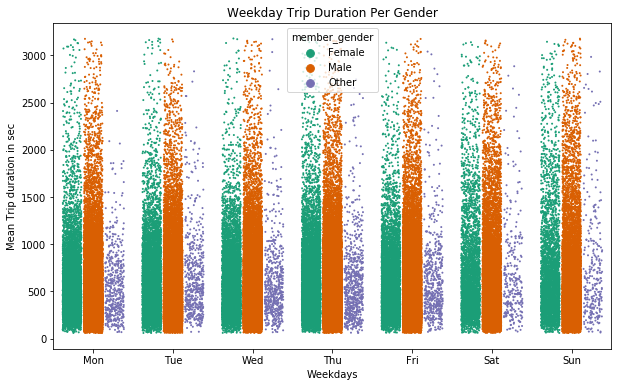

In [53]:
plt.figure(figsize=[10, 6])
sb.stripplot(data = df.query('duration_sec<duration_sec.quantile(0.99)'), x = 'start_week', y = 'duration_sec', hue = 'member_gender', order=day_order, palette = 'Dark2',
            size=2, jitter=0.35, dodge=True)
plt.title('Weekday Trip Duration Per Gender')
plt.ylabel('Mean Trip duration in sec')
plt.xlabel('Weekdays')
plt.show()

## Question 14: 
How does the average trip duration vary in weekdays between customers and subscribers?

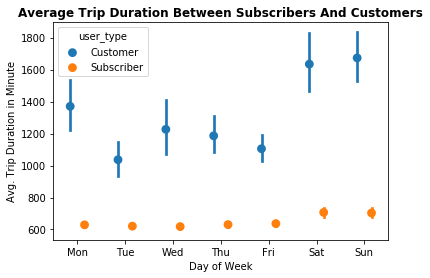

In [54]:
#15. average trip duration between subscribers and customers for each day of the week
sb.pointplot(data=df, x='start_week', y='duration_sec', hue='user_type', dodge=0.3, linestyles="", order=day_order);
plt.title('Average trip duration between subscribers and customers'.title(), weight='bold')
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');
plt.show()

## Observation:
1. Every day of the week, subscribers have shorter trips than customers but during the weekends (saturday and sunday) the duration of both user types tend to increase.

2. Subscribers maintained a consistent trip duration from monday to friday


## Question 15 
What age group have longer trip durations on weekdays?


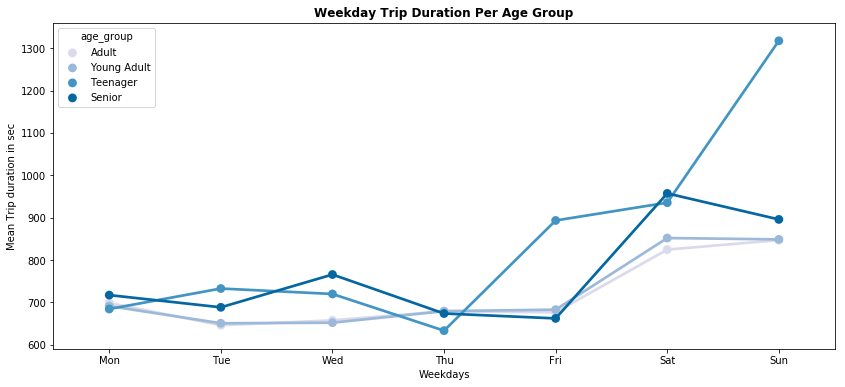

In [55]:
#16. Weekday trip duration per age group
day_order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=[14, 6])
sb.pointplot(data = df, x = 'start_week', y = 'duration_sec', hue = 'age_group', order=day_order, palette = 'PuBu', ci=None)
plt.title('Weekday Trip Duration Per Age Group'.title(), weight='bold')
plt.ylabel('Mean Trip duration in sec')
plt.xlabel('Weekdays')
plt.show()

## Observation
1. the teenagers seem to have longer trip durations during the weekends than other age groups. 
2. During weekdays, the trip duration varies between all age groups.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I could observed that when I did the age grouping, I could get more insight on the ages of the members The adult seems to have the highest trip while the teenagers as expected had the least trip

### Were there any interesting or surprising interactions between features?

> Yes there were. I was surprised to see that the female gender had more trip during the week day than the male gender

## Conclusions

>The dataset used for this analysis was the fordgo bikeshare 2019 dataset.
It was cleaned and outliers were removed. The dataset had interesting information that was uncovered during analysis. All necessary insight and information are well documneted.